In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

Matplotlib is building the font cache; this may take a moment.


In [3]:
CLASS_NAMES=['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
NUM_CLASSES=4
BASE_TRAIN_DIR="AlzheimerDataset\\train"
BASE_TEST_DIR="AlzheimerDataset\\test"
AUTOTUNE=tf.data.experimental.AUTOTUNE
NR_EPOCHS=50

In [4]:
NUM_IMAGES=[]
for label in CLASS_NAMES:
    dir_name=f"{BASE_TRAIN_DIR}\{label[:-2]}ed"
    NUM_IMAGES.append(len([name for name in os.listdir(dir_name)]))

In [5]:
print("Number of each type of image in our dataset:")
for label in range(4):
    print(f"{CLASS_NAMES[label]}:{NUM_IMAGES[label]}")

Number of each type of image in our dataset:
MildDementia:717
ModerateDementia:52
NonDementia:2560
VeryMildDementia:1792


In [8]:
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)
val=ImageDataGenerator(rescale=1./255)

In [10]:

train_data=tf.keras.preprocessing.image_dataset_from_directory(
    BASE_TRAIN_DIR,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000
)

Found 6605 files belonging to 4 classes.
Using 5284 files for training.


In [11]:

val_data=tf.keras.preprocessing.image_dataset_from_directory(
    BASE_TRAIN_DIR,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
)

Found 6605 files belonging to 4 classes.
Using 1321 files for validation.


In [12]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    BASE_TEST_DIR,
    image_size=(224,224),
    batch_size=32,
    seed=1000
)

Found 1279 files belonging to 4 classes.


In [13]:
train_data.class_names=CLASS_NAMES
val_data.class_names=CLASS_NAMES

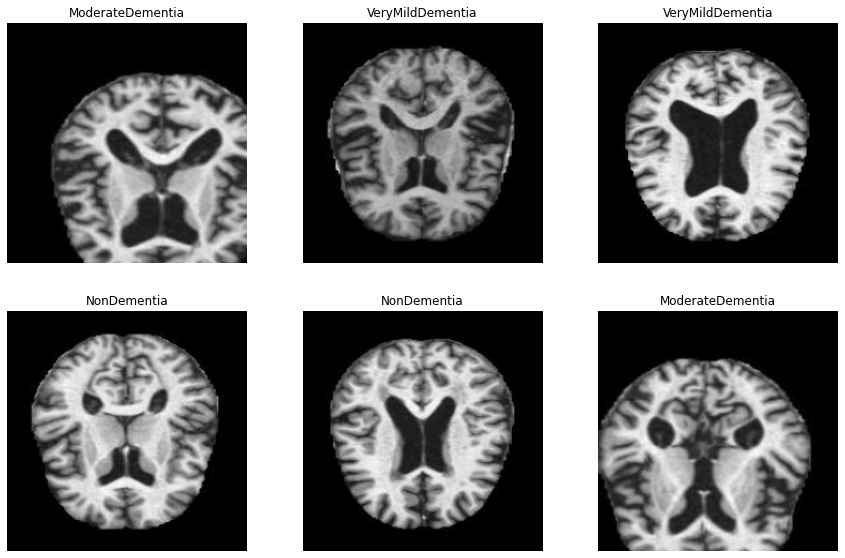

In [15]:
plt.figure(figsize=(15,15))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [16]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(224,224, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.SeparableConv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 112, 112, 32)     688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 112, 112, 32)     1344      
 leConv2D)                                                       
                                                        

In [18]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )

In [19]:
model_sum=model.fit(train_data,
                    validation_data=val_data,
                    epochs=NR_EPOCHS)

Epoch 1/50
166/166 [==============================] - 742s 4s/step - loss: 0.7765 - accuracy: 0.6575 - val_loss: 2.1412 - val_accuracy: 0.2332
Epoch 2/50
166/166 [==============================] - 618s 4s/step - loss: 0.4732 - accuracy: 0.8022 - val_loss: 1.6670 - val_accuracy: 0.2574
Epoch 3/50
166/166 [==============================] - 611s 4s/step - loss: 0.2906 - accuracy: 0.8929 - val_loss: 1.2390 - val_accuracy: 0.4285
Epoch 4/50
166/166 [==============================] - 591s 4s/step - loss: 0.2139 - accuracy: 0.9209 - val_loss: 0.4182 - val_accuracy: 0.7903
Epoch 5/50
166/166 [==============================] - 602s 4s/step - loss: 0.1282 - accuracy: 0.9519 - val_loss: 0.1614 - val_accuracy: 0.9394
Epoch 6/50
166/166 [==============================] - 579s 3s/step - loss: 0.0997 - accuracy: 0.9640 - val_loss: 0.6708 - val_accuracy: 0.7888
Epoch 7/50
166/166 [==============================] - 583s 4s/step - loss: 0.0859 - accuracy: 0.9693 - val_loss: 0.3947 - val_accuracy: 0.8395

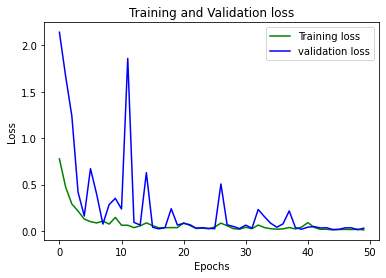

In [20]:
loss_train = model_sum.history['loss']
loss_val = model_sum.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()

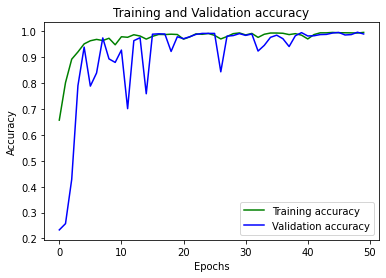

In [21]:
accuracy_train = model_sum.history['accuracy']
accuracy_val = model_sum.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

In [22]:
model.evaluate(test_data)

40/40 [==============================] - 43s 1s/step - loss: 1.8973 - accuracy: 0.6317


[1.8973000049591064, 0.6317435503005981]

In [134]:
model.save("model\\alzheimer_model.h5")

In [138]:
file_path='AlzheimerDataset\\test\\ModerateDemented\\27 (2).jpg'
image=tf.keras.preprocessing.image.load_img(file_path)
image=tf.image.resize(image,(224,224))
input_array=tf.keras.preprocessing.image.img_to_array(image)
input_array=np.array([input_array])
pred=model.predict(input_array)
res=np.argmax(pred)
re1=CLASS_NAMES[res]

1/1 [==============================] - 0s 43ms/step
